In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

## Iris

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

In [15]:
km = KMeans(n_clusters=3, max_iter=1000)
iris_km = km.fit(iris.data)
confusion_matrix(iris_km.labels_, iris.target)

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]])

In [16]:
pca = PCA(n_components=2)
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)

In [17]:
km = KMeans(n_clusters=3, max_iter=1000)
irispca_km = km.fit(iris_pca)
confusion_matrix(irispca_km.labels_, iris.target)

array([[50,  0,  0],
       [ 0,  3, 36],
       [ 0, 47, 14]])

In [21]:
gmm = GaussianMixture(n_components=3)
iris_gmm = gmm.fit(iris.data)
confusion_matrix(iris_gmm.predict(iris.data), iris.target)

array([[50,  0,  0],
       [ 0, 45,  0],
       [ 0,  5, 50]])

In [20]:
gmm = GaussianMixture(n_components=3)
irispca_gmm = gmm.fit(iris_pca)
confusion_matrix(irispca_gmm.predict(iris_pca), iris.target)

array([[ 0,  3, 50],
       [50,  0,  0],
       [ 0, 47,  0]])

## Digits

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()

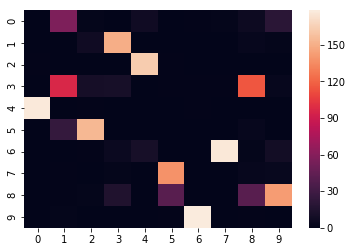

In [24]:
gmm = GaussianMixture(n_components=10)
digits_gmm = gmm.fit(digits.data)
sns.heatmap(confusion_matrix(digits_gmm.predict(digits.data), digits.target))

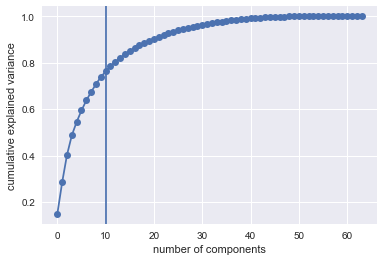

In [38]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axvline(10)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [40]:
pca = PCA(n_components=10).fit(digits.data)
digits_pca = pca.transform(digits.data)

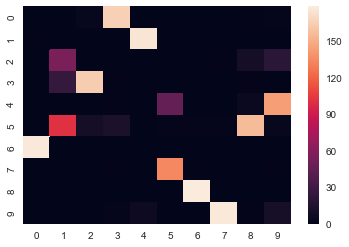

In [41]:
gmm = GaussianMixture(n_components=10)
digitspca_gmm = gmm.fit(digits_pca)
sns.heatmap(confusion_matrix(digitspca_gmm.predict(digits_pca), digits.target))

In [44]:
from sklearn.metrics import v_measure_score
print("Raw: ", v_measure_score(digits.target, digits_gmm.predict(digits.data)))
print("PCA: ", v_measure_score(digits.target, digitspca_gmm.predict(digits_pca)))

Raw:  0.7584772130911812
PCA:  0.8221129134603291


## 20Newsgroup

In [45]:
from sklearn.datasets import twenty_newsgroups
ng20 = twenty_newsgroups.fetch_20newsgroups(subset='train', categories=['rec.sport.baseball', 'comp.graphics', 'comp.windows.x'], remove=['headers','footers','quotes'])
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english', max_df=0.95)
ng20_occur = count_vect.fit_transform(ng20.data)
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(ng20_occur)
ng20_tfidf = tf_transformer.transform(ng20_occur)

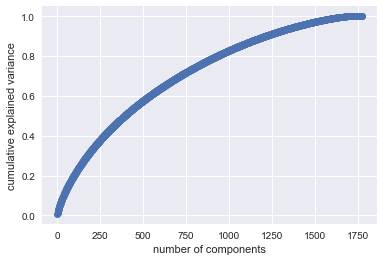

In [47]:
pca = PCA().fit(ng20_tfidf.toarray())
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [49]:
pca = PCA(n_components=1000).fit(ng20_tfidf.toarray())
ng20_pca = pca.transform(ng20_tfidf.toarray())

In [50]:
gmm = GaussianMixture(n_components=3)
ng20pca_gmm = gmm.fit(ng20_pca)

In [51]:
confusion_matrix(ng20pca_gmm.predict(ng20_pca), ng20.target)

array([[247, 183, 578],
       [  9, 283,   0],
       [328, 127,  19]])

In [52]:
print("PCA: ", v_measure_score(ng20.target, ng20pca_gmm.predict(ng20_pca)))

PCA:  0.3151556418672915
